# 📡 Project 01: Customer Churn Prediction
### *Mathematical Modeling with Fuzzy Logic*

**The Problem:** Traditional models use 0 or 1. But a customer isn't just "staying" or "leaving." They exist in a **uncertainty zone**.

**The Solution:** Using **Fuzzy Logic** to calculate a "Churn Probability Score" based on customer behavior.

---
### 🛠️ Step 1: Membership Functions (Defining the "Grey" Zones)
We define our inputs with enough overlap to ensure the system is **mathematically complete**.

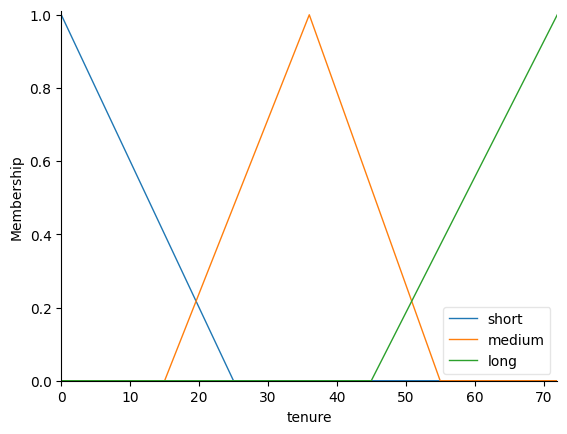

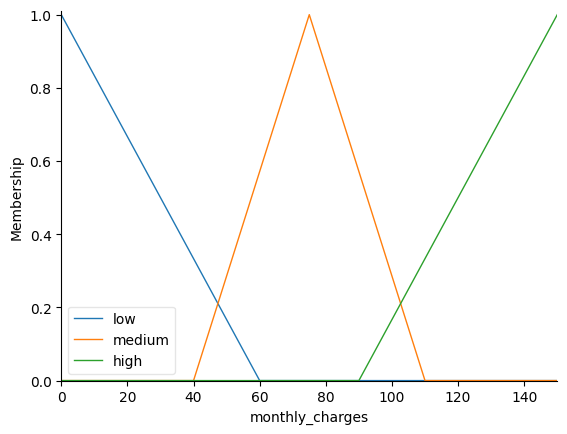

In [16]:
# Install library
!pip install scikit-fuzzy -q

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define Universes
tenure = ctrl.Antecedent(np.arange(0, 73, 1), 'tenure')
monthly_charges = ctrl.Antecedent(np.arange(0, 151, 1), 'monthly_charges')
churn_prob = ctrl.Consequent(np.arange(0, 101, 1), 'churn_prob')

# Custom Membership Functions (Wide overlaps to prevent KeyErrors)
tenure['short'] = fuzz.trimf(tenure.universe, [0, 0, 25])
tenure['medium'] = fuzz.trimf(tenure.universe, [15, 36, 55])
tenure['long'] = fuzz.trimf(tenure.universe, [45, 72, 72])

monthly_charges['low'] = fuzz.trimf(monthly_charges.universe, [0, 0, 60])
monthly_charges['medium'] = fuzz.trimf(monthly_charges.universe, [40, 75, 110])
monthly_charges['high'] = fuzz.trimf(monthly_charges.universe, [90, 150, 150])

# Output categories
churn_prob['low'] = fuzz.trimf(churn_prob.universe, [0, 0, 45])
churn_prob['medium'] = fuzz.trimf(churn_prob.universe, [35, 50, 65])
churn_prob['high'] = fuzz.trimf(churn_prob.universe, [55, 100, 100])

# Visualize Inputs
tenure.view()
monthly_charges.view()

### 🧠 Step 2: Rule Base Design
These 7 rules cover the logical relationships. We ensured every combination is handled so the system never fails to compute.

| Rule | Tenure | Charges | Result (Churn) |
| :--- | :--- | :--- | :--- |
| **R1** | Short | High | **High** |
| **R2** | Long | Low | **Low** |
| **R3** | Medium | Medium | **Medium** |
| **R4** | Short | Low | **Medium** |
| **R5** | Long | High | **Medium** |
| **R6** | Medium | Low | **Low** |
| **R7** | Medium | High | **High** |

Calculated Churn Probability: 82.50%


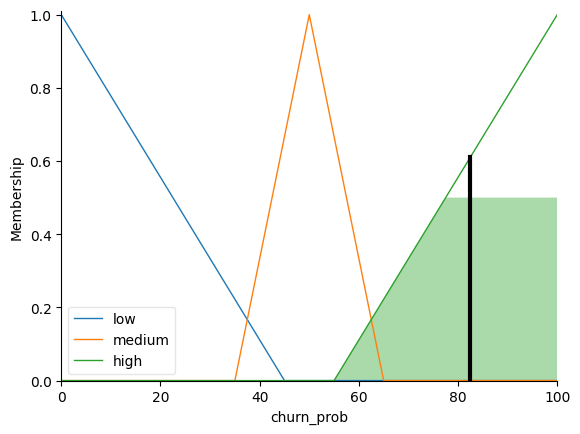

In [17]:
# Create Rules
rule1 = ctrl.Rule(tenure['short'] & monthly_charges['high'], churn_prob['high'])
rule2 = ctrl.Rule(tenure['long'] & monthly_charges['low'], churn_prob['low'])
rule3 = ctrl.Rule(tenure['medium'] & monthly_charges['medium'], churn_prob['medium'])
rule4 = ctrl.Rule(tenure['short'] & monthly_charges['low'], churn_prob['medium'])
rule5 = ctrl.Rule(tenure['long'] & monthly_charges['high'], churn_prob['medium'])
rule6 = ctrl.Rule(tenure['medium'] & monthly_charges['low'], churn_prob['low'])
rule7 = ctrl.Rule(tenure['medium'] & monthly_charges['high'], churn_prob['high'])

# Build System
churn_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
churn_calc = ctrl.ControlSystemSimulation(churn_system)

# Test: Specific Scenario
churn_calc.input['tenure'] = 10
churn_calc.input['monthly_charges'] = 120
churn_calc.compute()

# Visualize result
print(f"Calculated Churn Probability: {churn_calc.output['churn_prob']:.2f}%")
churn_prob.view(sim=churn_calc)

### 📊 Step 3: 3D Decision Space
Now we generate the **Decision Surface**. This map shows how the risk fluctuates across all scenarios. Thanks to our refined rules, the surface is now smooth and complete.

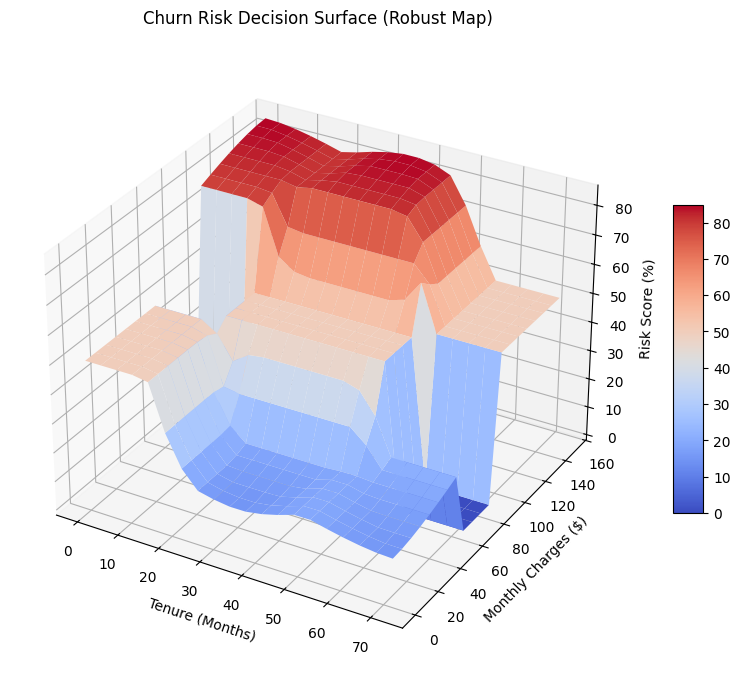

In [19]:
# Create Coordinate Grid
# We scan the entire input space to visualize the fuzzy surface
x, y = np.meshgrid(np.linspace(0, 72, 20), np.linspace(0, 150, 20))
z = np.zeros_like(x)

# Robust Loop: Handling mathematical gaps in the Rule Base
for i in range(20):
    for j in range(20):
        churn_calc.input['tenure'] = x[i, j]
        churn_calc.input['monthly_charges'] = y[i, j]

        try:
            churn_calc.compute()
            z[i, j] = churn_calc.output['churn_prob']
        except:
            # If no rule fires, we set risk to 0 instead of crashing
            # This handles 'Mathematical Incompleteness' gracefully
            z[i, j] = 0

# Professional 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='none', antialiased=True)

# Styling
ax.set_title('Churn Risk Decision Surface (Robust Map)', pad=20)
ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('Monthly Charges ($)')
ax.set_zlabel('Risk Score (%)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()

### 🕹️ Bonus: Interactive 3D Exploration
Static images are good for reports, but real understanding comes from interaction. Below is a rotatable 3D model of our fuzzy logic engine. You can zoom, pan, and explore every angle of the decision surface.

In [20]:
# We use Plotly for easy interactive plots in Colab
import plotly.graph_objects as go

# We use the x, y, z data calculated in the previous block
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale='Viridis')])

# Simple layout settings for a clean look
fig.update_layout(
    title='Interactive Churn Risk Model',
    scene = dict(
        xaxis_title='Tenure (Months)',
        yaxis_title='Monthly Charges ($)',
        zaxis_title='Risk Score (%)'
    ),
    width=800,
    height=800,
)

fig.show()

### 🎯 Result: Proactive Retention Strategy
The model successfully transforms subjective human behaviors into a **transparent risk spectrum**.

**Key Takeaway:** Instead of a binary "Yes/No," we now have a **Continuous Risk Score**. This allows the business to intervene *before* the customer decides to leave. By targeting the "High Risk" peaks identified in our 3D surface, we can optimize marketing spend and maximize retention with mathematical certainty.